In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from typing import List

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
plt.style.use('dark_background')

In [4]:
samples = 2048
clusters = 4
dimensions = 2
spread = 0.2

centers = np.stack([np.sin(np.arange(0, 2*np.pi, 2*np.pi/clusters)), np.cos(np.arange(0, 2*np.pi, 2*np.pi/clusters))], axis=-1)
colors = np.random.uniform(0, 1, (clusters, 3))
contexts = np.random.randint(0, clusters, (samples))
contextpoints = centers[contexts] + np.random.normal(0, spread, (samples, dimensions))

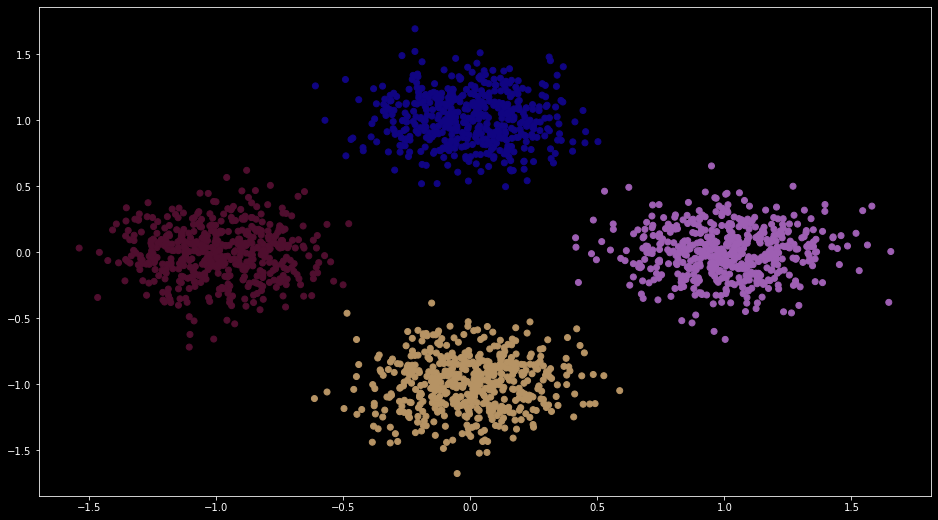

In [5]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(*contextpoints.T, color=colors[contexts])
plt.show()

In [6]:
# Generate data points with normalized feature values and noise
variance = 0.1
datapoints = np.random.uniform(-1, 1, (samples, dimensions)) + np.random.normal(0, variance, (samples, dimensions))
# Generate coefficients
base_coefficients = np.random.uniform(-1, 1, (dimensions))
interaction_strength = 0.5
interaction_coefficients = interaction_strength * np.random.uniform(-1, 1, (dimensions, clusters))
coefficients = base_coefficients[:, np.newaxis] + interaction_coefficients[:, contexts]
# Generate labels
boundary = 0.0
labels = (np.einsum('bd,bd->b', datapoints, coefficients.T) > boundary).astype(int)

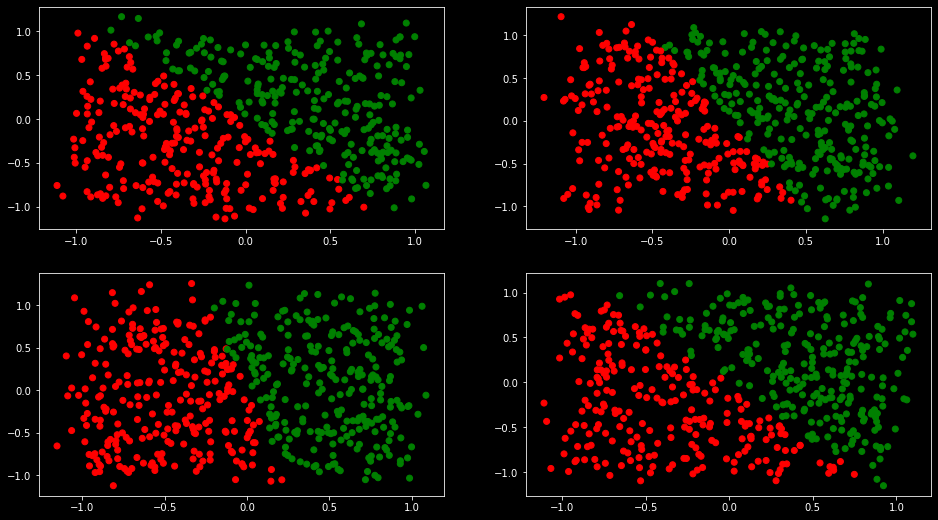

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
ax = ax.reshape(-1)
for idx in range(clusters):
    indices = np.arange(samples)[contexts == idx]
    inputs, targets = datapoints[indices], labels[indices]
    colors = np.where(targets == 0, 'r', 'g')
    ax[idx].scatter(*inputs.T, color=colors)

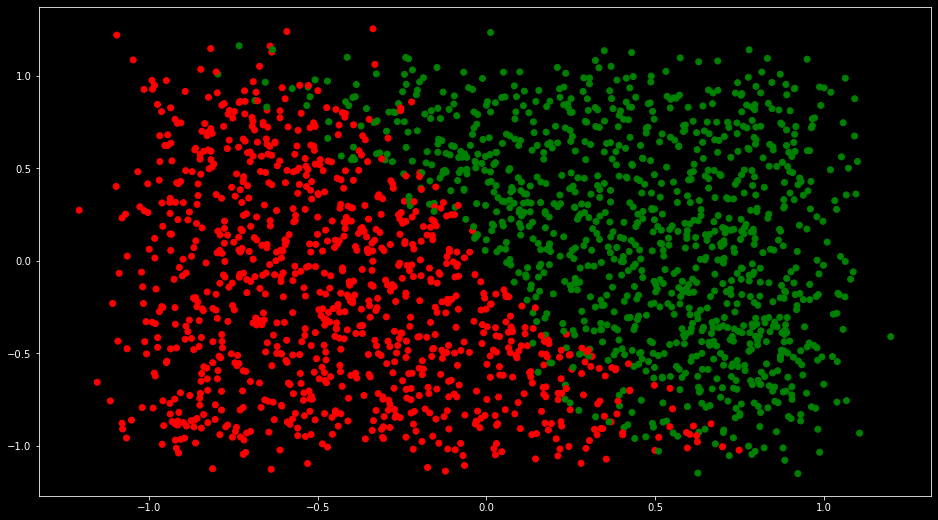

In [8]:
colors = np.array(['r', 'g'])

fig = plt.figure(figsize=(16, 9))
plt.scatter(*datapoints.T, color=colors[labels], alpha=1.0)
plt.show()

In [9]:
reg_logreg = LogisticRegression()
reg_logreg = reg_logreg.fit(datapoints, labels)
predictions = reg_logreg.predict(datapoints)

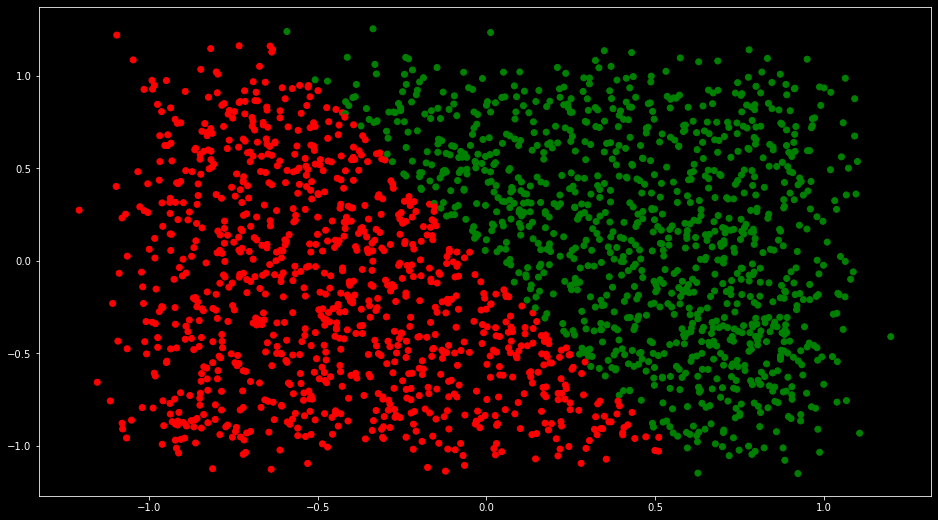

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[predictions])
plt.show()

In [11]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       978
           1       0.96      0.95      0.95      1070

    accuracy                           0.95      2048
   macro avg       0.95      0.95      0.95      2048
weighted avg       0.95      0.95      0.95      2048



In [12]:
ca_logreg = LogisticRegression()
features = np.concatenate([datapoints, contextpoints], axis=-1)
ca_logreg = ca_logreg.fit(features, labels)
predictions = ca_logreg.predict(features)

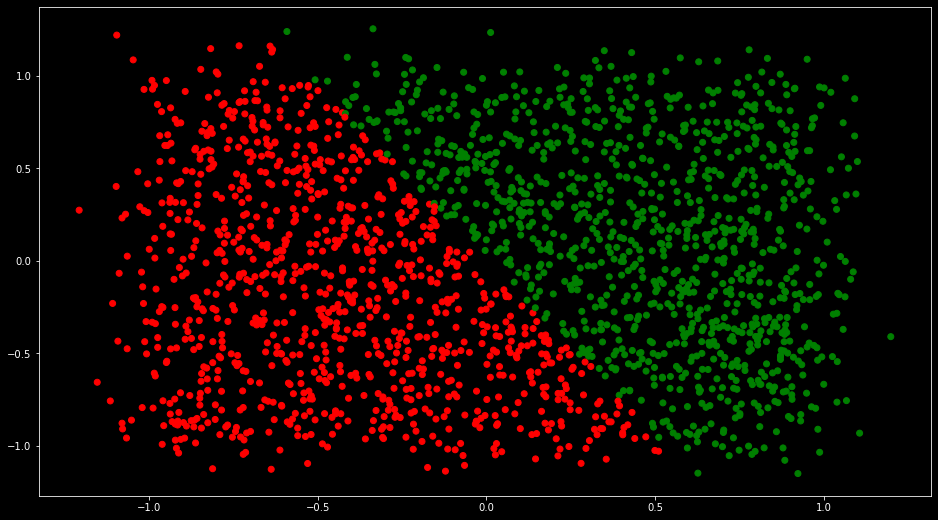

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[predictions])
plt.show()

In [14]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       978
           1       0.95      0.95      0.95      1070

    accuracy                           0.95      2048
   macro avg       0.95      0.95      0.95      2048
weighted avg       0.95      0.95      0.95      2048



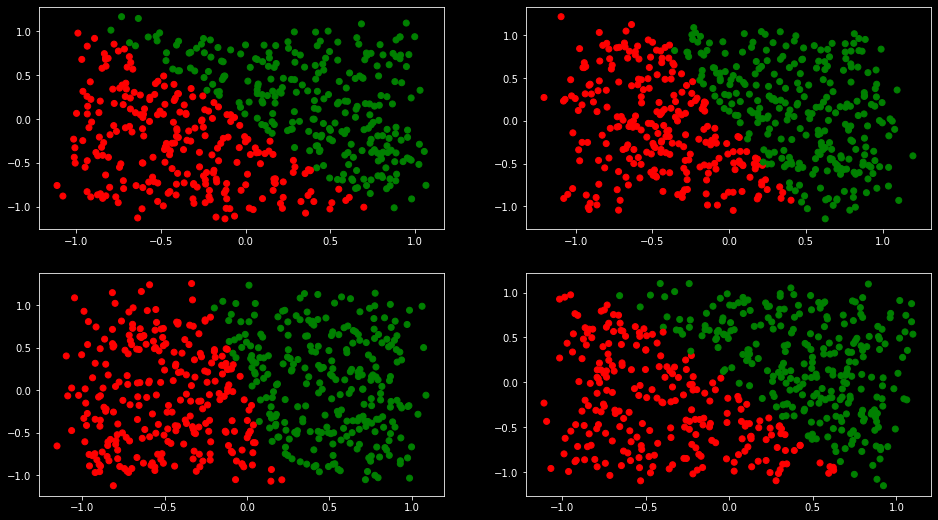

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
ax = ax.reshape(-1)

logreg = LogisticRegression()
total_predictions = np.zeros_like(labels)

for idx in range(clusters):
    indices = np.arange(samples)[contexts == idx]
    inputs, targets = datapoints[indices], labels[indices]
    split_logreg = logreg.fit(inputs, targets)
    predictions = split_logreg.predict(inputs)
    total_predictions[indices] = predictions
    ax[idx].scatter(*inputs.T, color=colors[predictions])
plt.show()

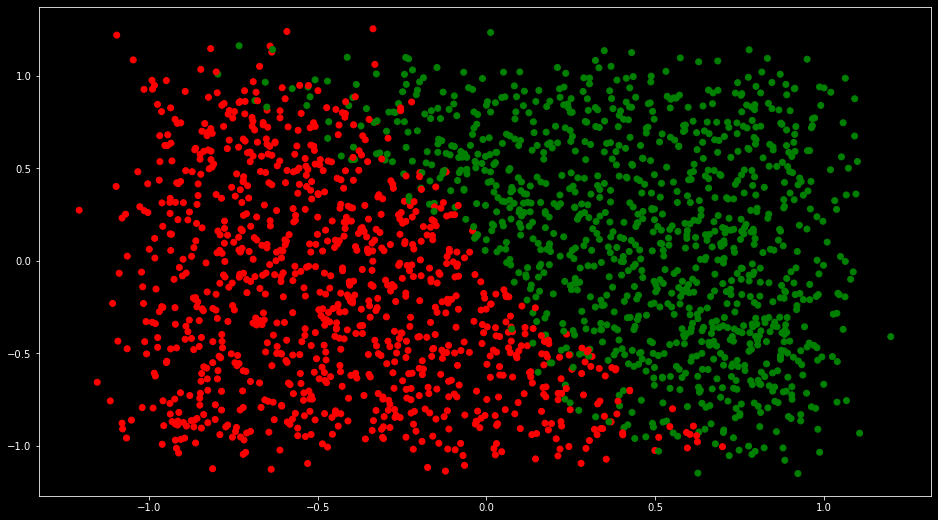

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[total_predictions])
plt.show()

In [17]:
print(classification_report(total_predictions, labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       1.00      0.99      0.99      1070

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048



In [65]:
units = 2
rank = 2

beta = 0.9
gamma = 0.999

epochs = 500
learning_rate = 10e-3
nu = learning_rate

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
ax = ax.reshape(-1)

total_predictions = np.zeros_like(labels)

for idx in range(clusters):
    indices = np.arange(samples)[contexts == idx]
    inputs, targets = datapoints[indices], labels[indices]
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(2, activation='softmax')])
    model.compile(tf.keras.optimizers.SGD(learning_rate), tf.keras.losses.sparse_categorical_crossentropy)
    history = model.fit(inputs, targets, epochs=epochs, verbose=False)
    predictions = np.argmax(model.predict(inputs), axis=-1)
    total_predictions[indices] = predictions
    ax[idx].scatter(*inputs.T, color=colors[predictions])
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[total_predictions])
plt.show()

In [ ]:
print(classification_report(total_predictions, labels))

In [69]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units, 'relu'), tf.keras.layers.Dense(2, activation='softmax')])
model.compile(tf.keras.optimizers.SGD(learning_rate), tf.keras.losses.sparse_categorical_crossentropy)
features = datapoints
history = model.fit(features, labels, epochs=epochs, verbose=False)
predictions = np.argmax(model.predict(features), axis=-1)

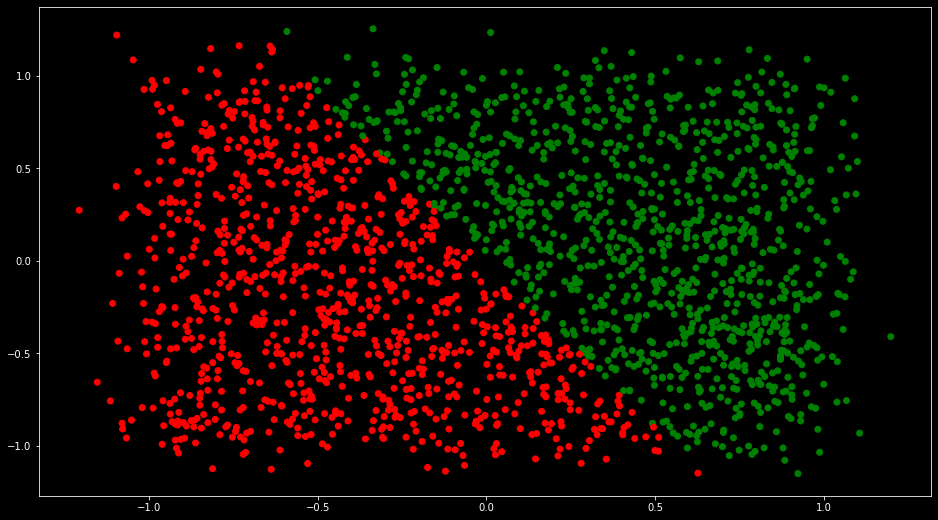

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[predictions])
plt.show()

In [71]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       975
           1       0.95      0.95      0.95      1073

    accuracy                           0.95      2048
   macro avg       0.95      0.95      0.95      2048
weighted avg       0.95      0.95      0.95      2048



In [72]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units, 'relu'), tf.keras.layers.Dense(2, activation='softmax')])
model.compile(tf.keras.optimizers.SGD(learning_rate), tf.keras.losses.sparse_categorical_crossentropy)
features = np.concatenate([datapoints, contextpoints], axis=-1)
history = model.fit(features, labels, epochs=epochs, verbose=False)
predictions = np.argmax(model.predict(features), axis=-1)

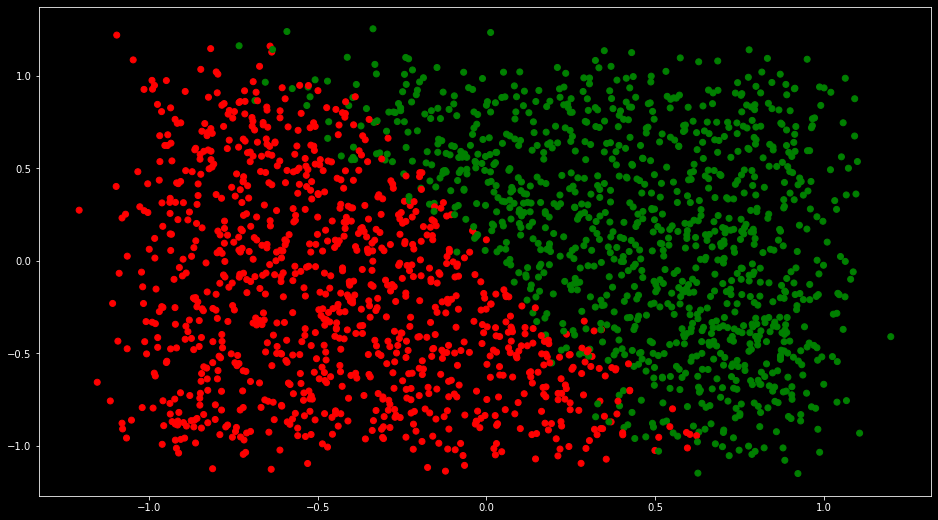

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[predictions])
plt.show()

In [74]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1068

    accuracy                           0.98      2048
   macro avg       0.98      0.98      0.98      2048
weighted avg       0.98      0.98      0.98      2048



In [75]:
from src.layers import CADenseAdd, CADenseMul
from src.optimizers import SVDAdam, SVDSGD
from src.models import ContextModelWrapper

In [76]:
batch_size = 128
projection_rank = 4
projection = 'softmax'

In [77]:
from src.optimizers.utils import unpack
import types 

def context_train_step(self, data):
    """Training step"""
    # Unpack
    (x, c), y = data
    # Get gradients
    with tf.GradientTape() as tape:
        y_pred = self((x, c), training=True)
        loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        trainable_variables = self.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
    # Make gradients and variables zip
    grads_and_vars = zip(gradients, trainable_variables)
    # Optimize variables
    self.optimizer.apply_gradients(grads_and_vars, c)
    # Update metrics (includes the metric that tracks the loss)
    self.compiled_metrics.update_state(y, y_pred)
    # Return a dict mapping metric names to current value
    return {m.name: m.result() for m in self.metrics}

In [81]:
# Architecture
inputs = tf.keras.layers.Input([2], name='input', batch_size=batch_size)
context = tf.keras.layers.Input([2], name='context', batch_size=batch_size)
hidden = inputs
for i in range(0):
    hidden = CADenseAdd(units, rank, activation, name=f'layer_{i}')([hidden, context])
outputs = CADenseAdd(units=2, rank=projection_rank, activation=projection, name='projection')([hidden, context])
# Model
model = tf.keras.models.Model(inputs=(inputs, context), outputs=outputs)
# Wrap model for train step modification
model.train_step = types.MethodType(context_train_step, model)
# Optimizer
optimizer = SVDAdam(model, learning_rate, nu)
# Compile
model.compile(optimizer, tf.keras.losses.sparse_categorical_crossentropy)
# Train model
history = model.fit(x=(datapoints, contextpoints), y=labels,epochs=epochs, verbose=0, batch_size=batch_size)

2021-09-01 08:30:30.984212: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x55dddbce1110


In [82]:
predictions = np.argmax(model((datapoints, contextpoints)).numpy(), axis=1)

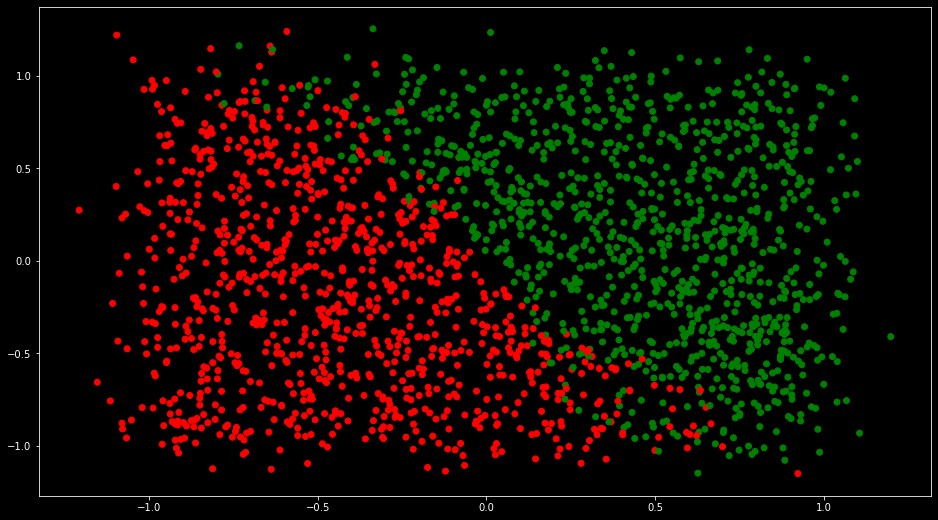

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(*datapoints.T, color=colors[predictions])
plt.show()

In [84]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       979
           1       0.99      0.99      0.99      1069

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048

